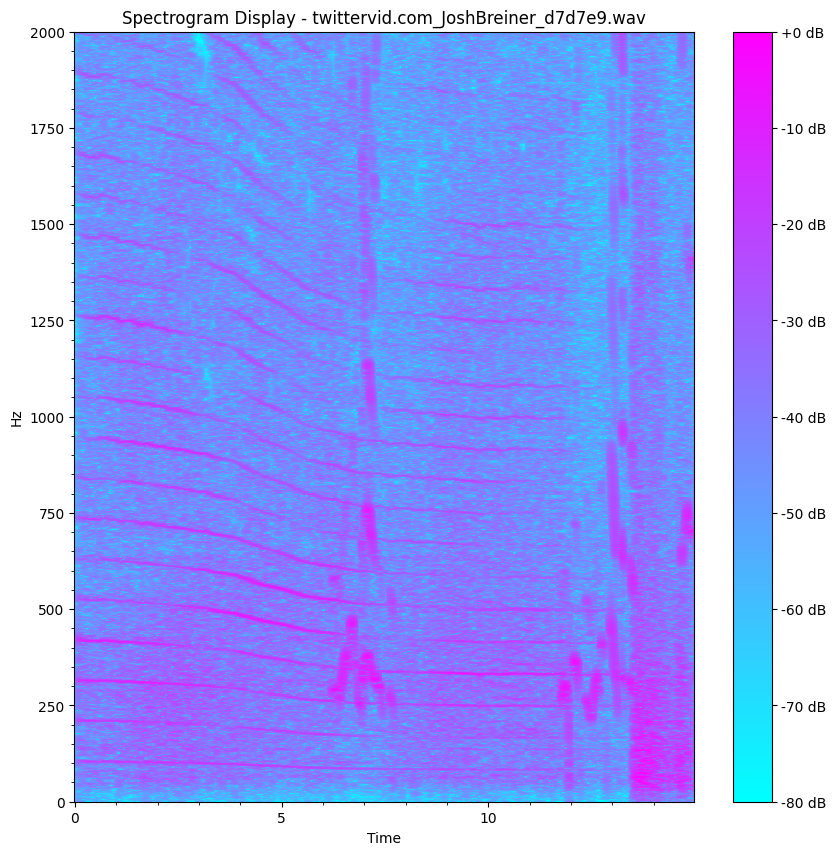

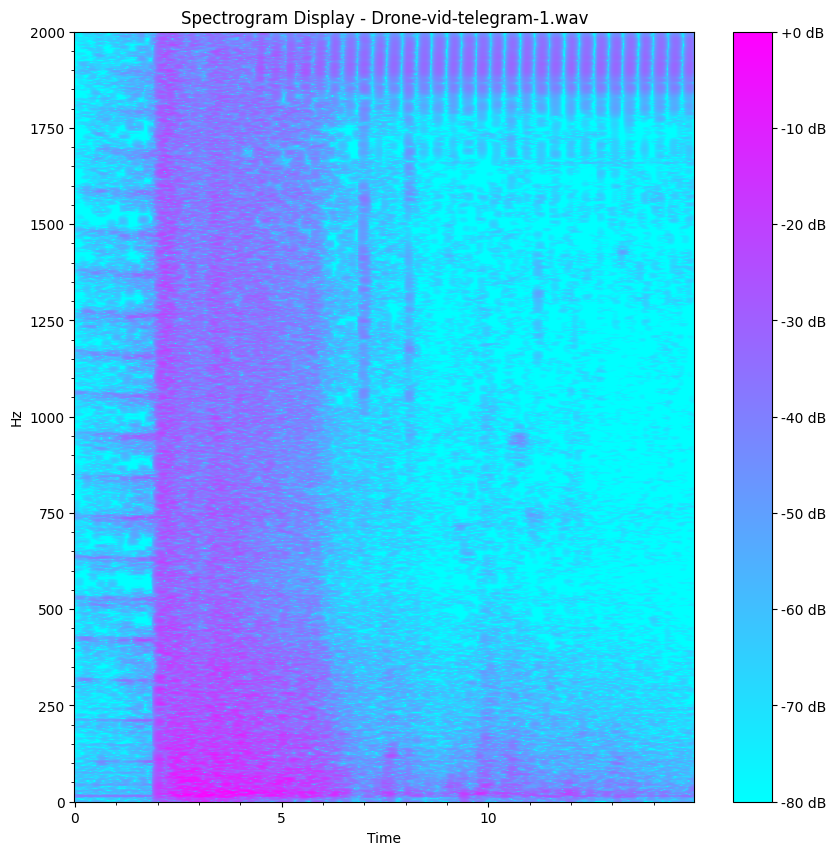

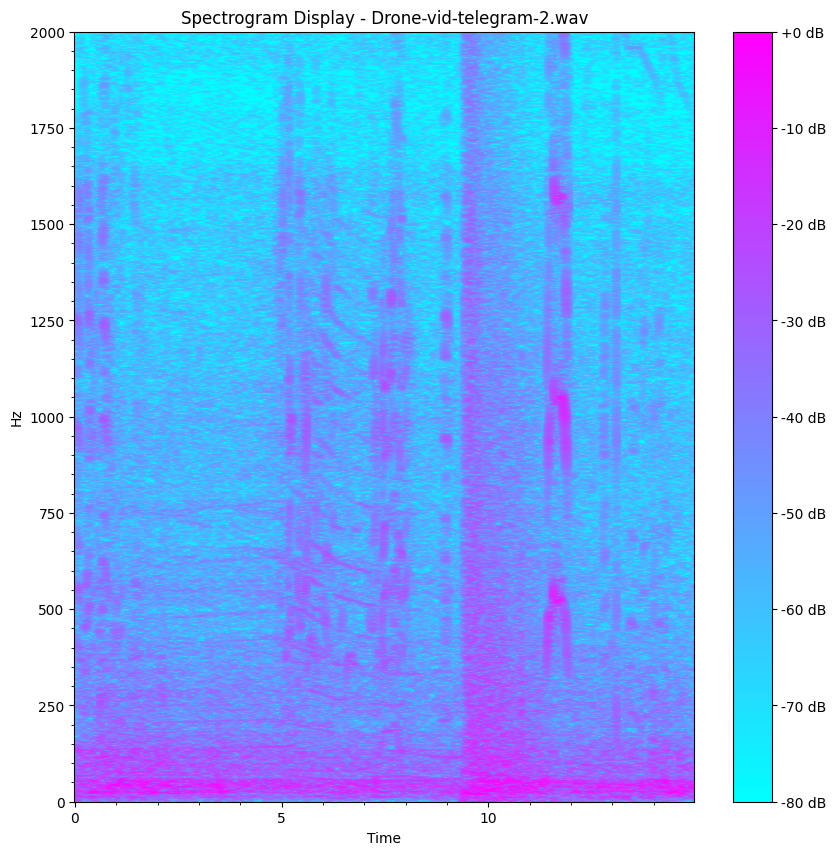

In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd


class FileData:
    def __init__(self, name, start, end):
        self.name = name
        self.start_time_seconds = start
        self.end_time_seconds = end

sample_rate = 44100

files = [
    FileData('twittervid.com_JoshBreiner_d7d7e9.wav', 0, 15),
    FileData('Drone-vid-telegram-1.wav', 0, 15),
    FileData('Drone-vid-telegram-2.wav', 0, 15),
]

# Load your WAV file
for file in files:
    data, samplerate = librosa.load(file.name, sr=sample_rate)
    
    start_sample = int(file.start_time_seconds * samplerate)
    end_sample = int(file.end_time_seconds * samplerate)
    data_segment = data[start_sample:end_sample]
    
    # Compute the spectrogram with a larger n_fft for finer frequency resolution
    n_fft_value = 2**14  # Increase this value for finer frequency details
    hop_length = 1024  # Defined hop length
    D = librosa.stft(data_segment, n_fft=n_fft_value, hop_length=hop_length)
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
    
    # Create the time vector for x-axis adjustment
    times = np.arange(S_db.shape[1]) * hop_length / samplerate + file.start_time_seconds
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 10))
    librosa.display.specshow(S_db, sr=samplerate, x_coords=times, x_axis='time', y_axis='hz', cmap='cool')
    plt.colorbar(format='%+2.0f dB')
    plt.ylim(0, 2000)  # Adjust this value if you want to change the frequency range displayed
    plt.title('Spectrogram Display - '+file.name)
    plt.minorticks_on()
    #plt.grid(which='both')
    plt.show()


In [13]:

def analyze_audio_fft(file_name, f0, f1, num_peaks, t_seconds, segment_length, plot=False):
    # Load the WAV file
    data, samplerate = librosa.load(file_name, sr=sample_rate)

    # Calculate the starting and ending samples for the segment
    start_sample = int(t_seconds * samplerate)
    end_sample = int((t_seconds + segment_length) * samplerate)
    segment = data[start_sample:end_sample]

    # Compute the FFT of the segment
    fft_result = np.fft.rfft(segment)
    frequencies = np.fft.rfftfreq(len(segment), d=1/samplerate)

    # Compute the magnitude of the FFT result (since FFT is complex)
    magnitude = np.abs(fft_result)

    # Find indices within the desired frequency range
    freq_indices = (frequencies >= f0) & (frequencies <= f1)

    # Find peaks within the specified frequency interval
    peaks, _ = find_peaks(magnitude[freq_indices], distance=20)
    actual_freqs = frequencies[freq_indices][peaks]
    actual_mags = magnitude[freq_indices][peaks]

    # Get the top N peaks within this range
    if len(actual_freqs) > num_peaks:
        top_indices = np.argsort(actual_mags)[-num_peaks:]  # Indices of the top N peaks
    else:
        top_indices = np.argsort(actual_mags)  # Use all if less than N

    top_freqs = actual_freqs[top_indices]
    top_mags = actual_mags[top_indices]

    # Optionally plot the FFT result with peak detection and annotations
    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(frequencies, magnitude, label='Magnitude Spectrum')
        plt.scatter(top_freqs, top_mags, color='r', s=100, label='Top Peaks')
        for i in range(len(top_freqs)):
            plt.annotate(f'{top_freqs[i]:.0f} Hz',
                         (top_freqs[i], top_mags[i]), textcoords="offset points", xytext=(0,10), ha='center')
        plt.title(f'FFT Result and Top Peaks at {t_seconds} seconds')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.xlim(0, 2000)  # Limit the x-axis for better visibility of lower frequencies
        plt.grid(True)
        plt.legend()
        plt.show()

    return top_freqs, top_mags



,t,f,v
0,0.5,105.0,39.200000
1,1.0,104.0,36.278846
2,1.5,104.0,36.278846
3,2.0,103.0,33.300971
4,2.5,102.0,30.264706
5,3.0,101.0,27.168317
6,3.5,99.0,20.787879
7,4.0,98.0,17.500000
8,4.5,94.0,3.648936
9,5.0,93.0,0.000000


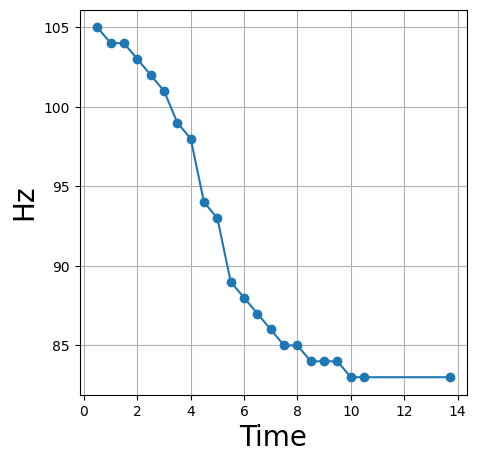

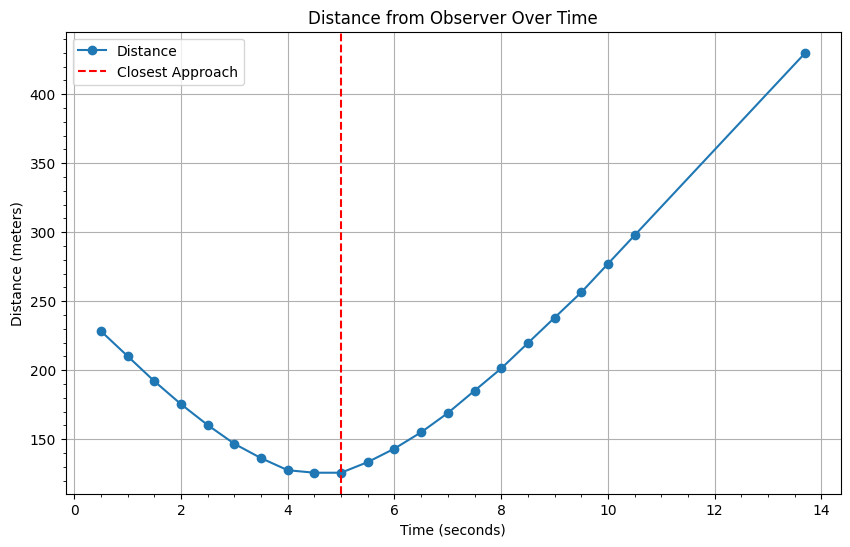

,t,f,v
0,0.5,15.0,-1783.600000
1,1.0,15.0,-1783.600000
2,1.5,15.0,-1783.600000
3,2.0,21.0,-1176.000000
4,2.5,55.0,-236.981818
5,3.0,18.0,-1429.166667
6,3.5,25.0,-932.960000
7,4.0,26.0,-883.884615
8,4.5,29.0,-756.965517
9,5.0,25.0,-932.960000


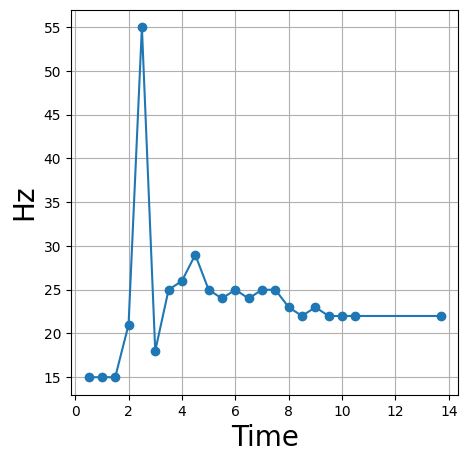

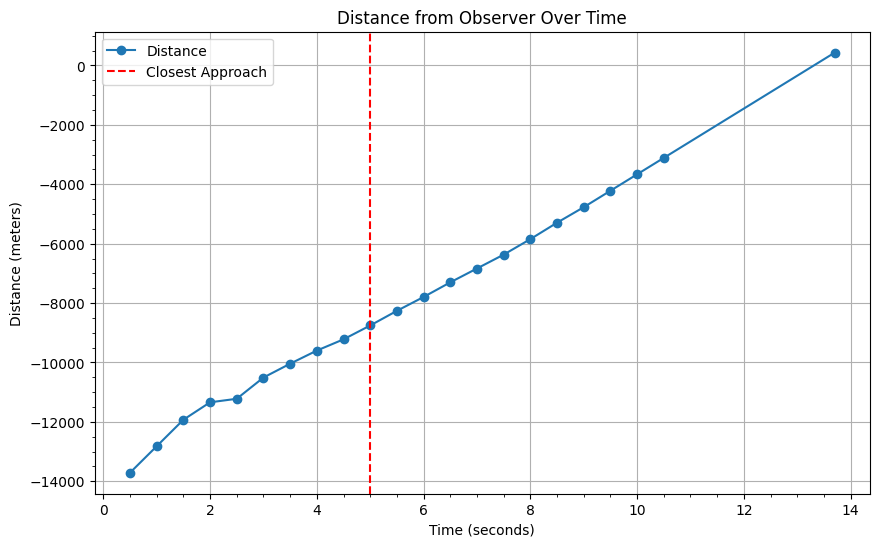

,t,f,v
0,0.5,25.0,-932.960000
1,1.0,43.0,-398.837209
2,1.5,46.0,-350.456522
3,2.0,43.0,-398.837209
4,2.5,43.0,-398.837209
5,3.0,46.0,-350.456522
6,3.5,46.0,-350.456522
7,4.0,27.0,-838.444444
8,4.5,55.0,-236.981818
9,5.0,41.0,-435.024390


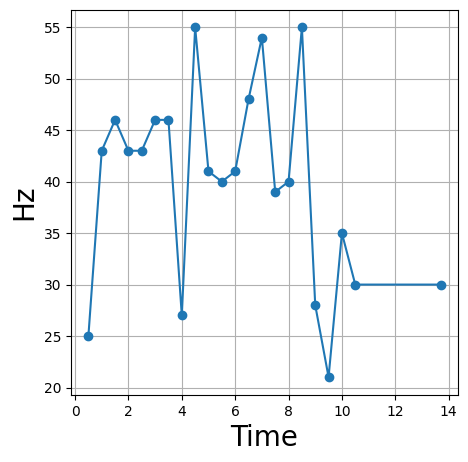

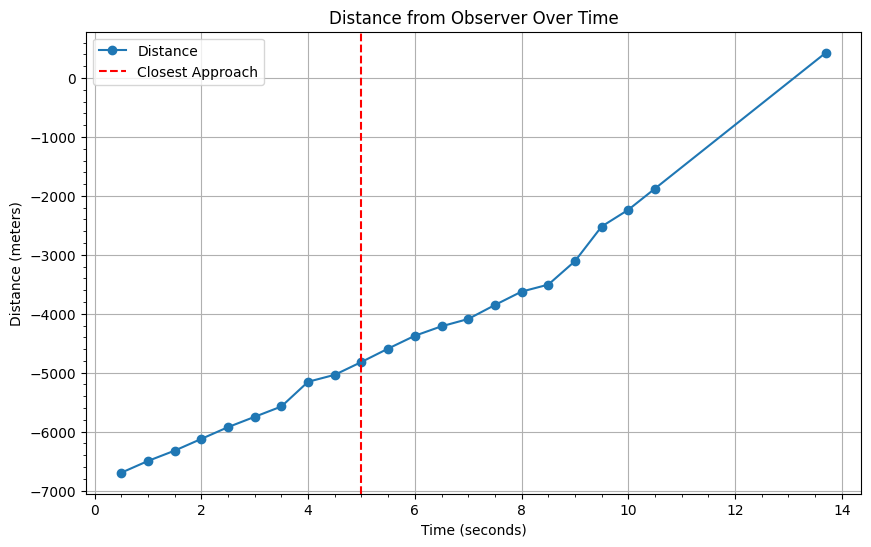

In [14]:

for file in files:
    f0 = 0
    f1 = 200
    num_peaks = 1
    plot = False
    start = 0
    stop = 10.5
    length = 1
    margin = 40
    t = start
    fs = list()
    ts = list()
    while t < stop:
        peaks, magnitudes = analyze_audio_fft(file.name, f0, f1, num_peaks, t, length, plot)
        f0 = peaks[0] - margin
        f1 = peaks[0] + margin
        t += length/2
        #print (peaks[0])
        ts.append(t)
        fs.append(peaks[0])
    
    #a bit ugly code - I wanted to add the last frequency data point 
    # but skip the Russian talking that confused my simple algorithm 
    # so I have hardcoded it
    fs.append(peaks[0]) 
    ts.append(13.7)
    
    
    
    df = pd.DataFrame({'t': ts, 'f': fs})
    fig, ax = plt.subplots(figsize = [5,5])
    ax.plot(df.t, df.f,marker = 'o')
    ax.set_ylabel('Hz',fontsize= 20)
    ax.set_xlabel('Time', fontsize = 20)
    ax.grid('both')
    
    # Distance over time plot
    f1 = 93  # Original frequency in Hz
    c = 343  # Speed of sound in m/s at 20 degrees Celsius
    
    df['v'] = c * (1 - f1/df.f)
    display(df)
    
    # Data setup
    times = df.t
    frequencies = df.f
    
    # Constants
    c = 343.0  # Speed of sound (m/s)
    f0 = 93.0  # Reference frequency at closest approach (Hz)
    
    # Calculate radial velocities
    v_r = c * (1 - f0 / frequencies)
    
    # Known final distance
    final_distance = 430  # meters at t = 10.5 seconds
    final_index = np.where(times == 13.7)[0][0]
    
    # Initialize distance array
    distances = np.zeros_like(times)
    distances[final_index] = final_distance
    
    # Integrate backward from the final point to the minimum
    for i in range(final_index, 0, -1):
        dt = times[i] - times[i - 1]
        distances[i - 1] = distances[i] + v_r[i] * dt
    
    # Integrate forward from the minimum to the start
    for i in range(final_index, len(times) - 1):
        dt = times[i + 1] - times[i]
        distances[i + 1] = distances[i] - v_r[i] * dt
    
    # Plotting results
    plt.figure(figsize=(10, 6))
    plt.plot(times, distances, 'o-', label='Distance')
    plt.axvline(x=5, color='r', linestyle='--', label='Closest Approach')
    plt.title('Distance from Observer Over Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Distance (meters)')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    
    plt.show()